<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/senoid_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0 

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 42.3MB/s 
     |████████████████████████████████| 450kB 57.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf
import math
import numpy as np
import random


Vmos dividir o período de pi em 10
 partes

In [4]:
delta=math.pi*0.1
delta

0.3141592653589793

Agora vamos criar sequências de 4 sen(deltas), começando com um a 40 deltas. O target será o sen(quinto delta)

In [0]:
X=[]
y=[]
random.seed(42)
for i in range(100):
  ini=random.randint(1,40)
  seq=[]
  for j in range(4):
    seq.append([math.sin((ini+j)*delta)])
  X.append(seq)
  y.append([math.sin((ini+4)*delta)])
X=np.array(X)
y=np.array(y)




In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(1,input_shape=(None,1),activation=lambda x:x))

In [0]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X, y, epochs=300)

Train on 100 samples
Epoch 1/300
100/100 [==============================] - 2s 21ms/sample - loss: 0.9974 - mse: 0.9974
Epoch 2/300
100/100 [==============================] - 0s 291us/sample - loss: 0.9738 - mse: 0.9738
Epoch 3/300
100/100 [==============================] - 0s 243us/sample - loss: 0.9540 - mse: 0.9540
Epoch 4/300
100/100 [==============================] - 0s 223us/sample - loss: 0.9336 - mse: 0.9336
Epoch 5/300
100/100 [==============================] - 0s 226us/sample - loss: 0.9136 - mse: 0.9136
Epoch 6/300
100/100 [==============================] - 0s 228us/sample - loss: 0.8953 - mse: 0.8953
Epoch 7/300
100/100 [==============================] - 0s 219us/sample - loss: 0.8807 - mse: 0.8807
Epoch 8/300
100/100 [==============================] - 0s 227us/sample - loss: 0.8641 - mse: 0.8641
Epoch 9/300
100/100 [==============================] - 0s 254us/sample - loss: 0.8481 - mse: 0.8481
Epoch 10/300
100/100 [==============================] - 0s 239us/sample - loss: 

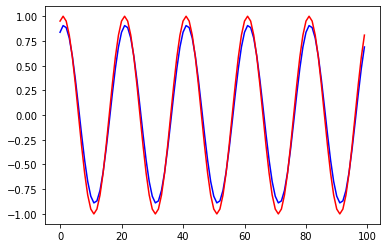

In [12]:
import matplotlib.pyplot as plt
lv=[]
lvr=[]
for i in range(100):
  seq=[[math.sin((i+j)*delta)] for j in range(4)]
  lv.append(model.predict([seq])[0][0])
  lvr.append(math.sin((i+4)*delta))
plt.plot(lv,color='blue')#previsão
plt.plot(lvr,color='red')#real
plt.show()

In [13]:
w=model.get_weights()
w

[array([[1.4513222]], dtype=float32),
 array([[-0.58284885]], dtype=float32),
 array([0.01524529], dtype=float32)]

In [14]:
model.predict([[[math.sin(delta)]]])

array([[0.46372852]], dtype=float32)

In [16]:
# First time

out = math.sin(delta)*1.4513222+0.01524529
out

0.46372851411363625

In [17]:
model.predict([[[math.sin(delta)], [math.sin(2*delta)]]])

array([[0.59802747]], dtype=float32)

In [21]:
# Second time
out1 = math.sin(2 * delta) * 1.4513222 + out * (-0.58284885) + 0.01524529
out1 

0.5980274443213254

In [22]:
model.predict([[[math.sin(delta)], [math.sin(2*delta)], [math.sin(3*delta)]]])

array([[0.8408301]], dtype=float32)

In [23]:
# Third time

out2 = math.sin(3 * delta) * 1.4513222 + out1 * (-0.58284885) + 0.01524529
out2

0.8408300059225127